In [60]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import matplotlib.gridspec as gridspec

In [68]:
NUM_IMAGES = 16
amur = 'amur/plain_reid_train/train'
elp = 'ELPephants/images'
im_size = 416,416

In [136]:
def loadLabels(folder):
    result = {}
    if 'amur' in folder:
        file = '{}/{}'.format(folder, 'reid_list_train.csv')
        with open(file) as f:
            lines = [x.strip() for x in f.readlines()]
            f.close()

        for line in lines:
            parts = line.split(',')
            result['{}/{}'.format(folder, parts[1])] = parts[0]
    else:
        file = '{}/{}'.format(folder, '../class_mapping.txt')
        names = [x for x in os.listdir(elp) if x.endswith('.jpg')]
        temp = {}
        with open(file) as f:
            lines = [x.strip() for x in f.readlines()]
            f.close()
        for line in lines:
            parts = line.split('\t')
            temp[parts[0]] = parts[1]
        
        for name in names:
            result['{}/{}'.format(folder, name)] = temp[name.split('_')[0]]
    return result            

In [135]:
folder = elp
file = '{}/{}'.format(folder, '../class_mapping.txt')
names = [x for x in os.listdir(elp) if x.endswith('.jpg')]
temp = {}
with open(file) as f:
    lines = [x.strip() for x in f.readlines()]
    f.close()
for line in lines:
    parts = line.split('\t')
    temp[parts[0]] = parts[1]

for name in names:
    result['{}/{}'.format(folder, name)] = temp[name.split('_')[0]]

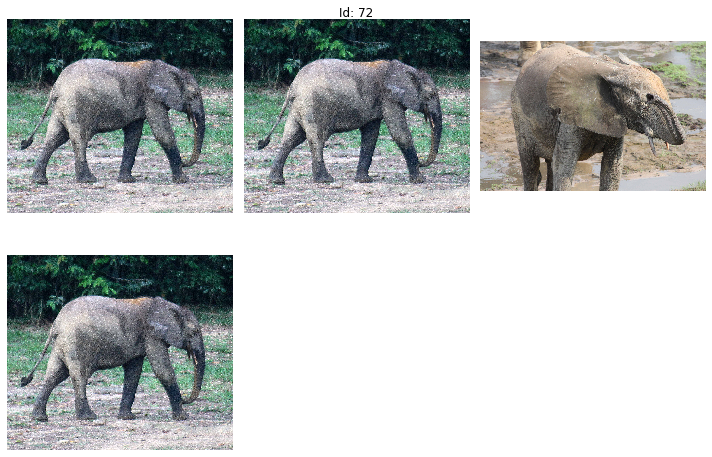

In [138]:
folder = elp
numImages = 8
labels = loadLabels(folder)

mapping = {}
# Construct reverse map
for key,value in labels.items():
    if not value in mapping:
        mapping[value] = []
    mapping[value].append(key)

subject = np.random.choice(np.array([x for x in mapping.keys()]).astype(int))
sub_images = mapping[str(subject)]

numImages = min(numImages, len(sub_images))
rows = int(numImages ** 0.5) + 1

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(rows, rows)

fig.suptitle('Id: {}'.format(subject))
k = 0
for i in np.random.choice(range(len(sub_images)), numImages):
    ax = plt.subplot(gs[k])
    k += 1
    plt.axis('off')
    imname = sub_images[i]
    image = cv2.imread(imname)
    # image = cv2.resize(image, (416,416))
    image = image[:,:,(2,1,0)] # CV2 reads image in BGR. Convert to RGB
    ax.imshow(image)
fig.tight_layout()

In [128]:
loadLabels(elp)

{}

In [72]:
def showImagesInFolder(folder, numImages):
    images = ['{}/{}'.format(folder,x) for x in os.listdir(folder) if x.endswith('.jpg')]
    rows = int(numImages ** 0.5)
    # fig, subplots = plt.subplots(rows, rows, sharex=True, sharey=True)
    _ = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(rows, rows)
    gs.update(wspace=0, hspace=0)
    
    
    k = 0
    to_show = np.random.choice(range(len(images)), numImages)
    '''
    for i in range(rows):
        for j in range(rows):
            image = cv2.imread(images[to_show[k]])
            subplots[i][j].imshow(image[:,:,(2,1,0)])
            subplots[i][j].set_axis_off()
            k += 1
    '''
    for i in range(numImages):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        image = cv2.imread(images[to_show[i]])
        image = cv2.resize(image, im_size)
        image = image[:,:,(2,1,0)] # CV2 reads image in BGR. Convert to RGB
        ax.imshow(image)
    

In [78]:
loadLabels(elp)

{}

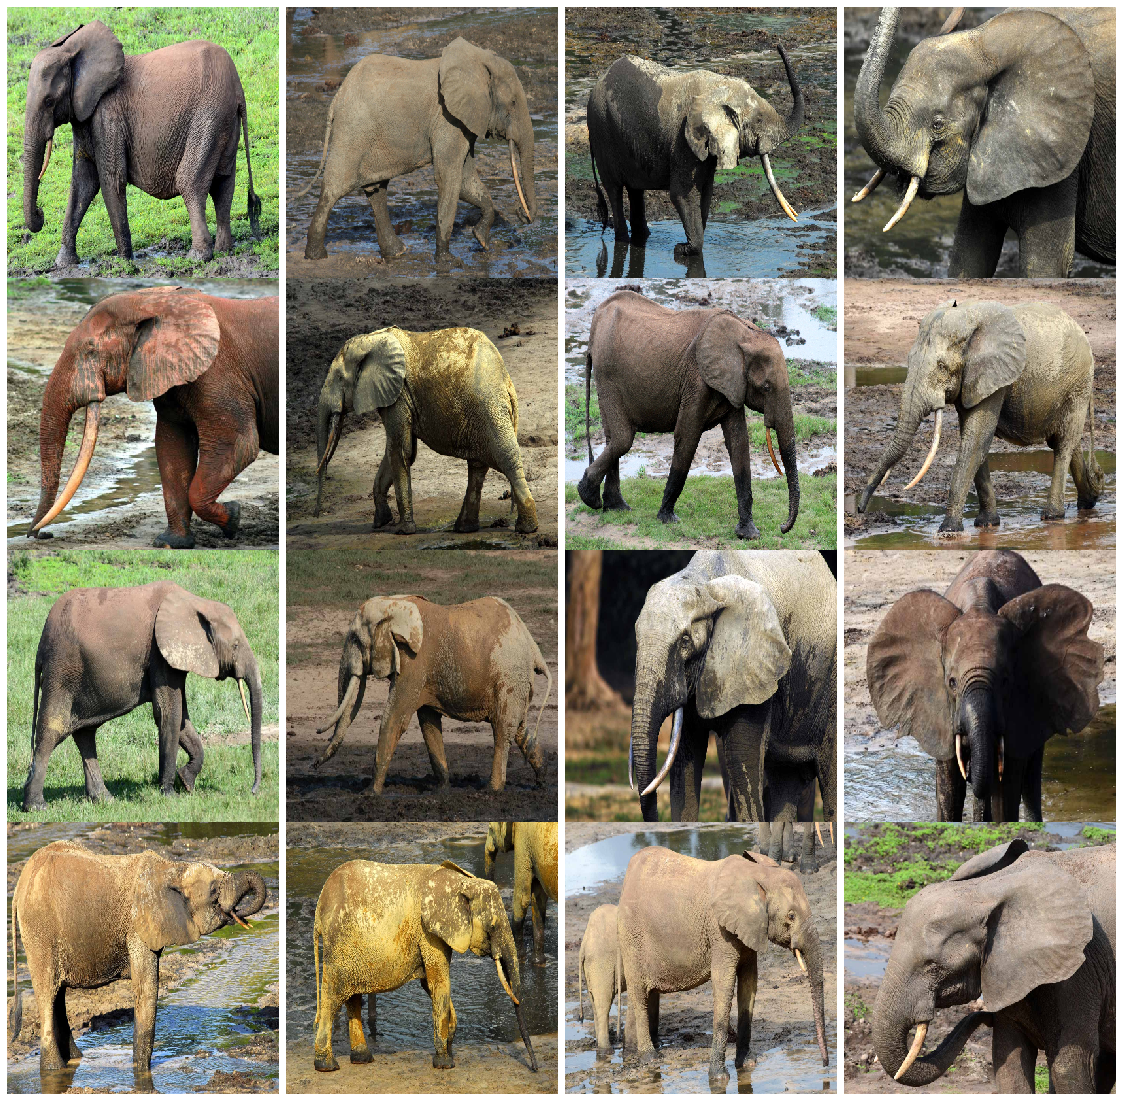

In [73]:
showImagesInFolder(elp, NUM_IMAGES)